# EDA — PurchasesFINAL12312016


In [ ]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargamos el dataset
df = pd.read_csv ('PurchasesFINAL12312016.csv', low_memory=False)
print('Archivo cargado:PurchasesFINAL12312016.csv')
print('Shape:', df.shape)


Archivo cargado:PurchasesFINAL12312016.csv
Shape: (2372474, 16)


In [3]:
# Vitazo inicial
print('\nColumns:')
print(df.columns.tolist())


Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']


In [22]:
df.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [ ]:
# Columnas que podrían tener unidades o símbolos
cols_to_check = ['Size', 'PurchasePrice', 'Dollars', 'Quantity']

for col in cols_to_check:
    print(f"\n🔍 Análisis de columna: {col}")
    print("-" * 40)
    
    # Mostrar tipo de dato
    print("Tipo de dato:", df[col].dtype)
    
    # Mostrar cantidad de valores únicos (solo si no es enorme)
    if df[col].nunique() < 30:
        print("Valores únicos:", df[col].unique())
    else:
        print(f"Valores únicos: {df[col].nunique()}")
        print("Ejemplos:", df[col].unique()[:10])  # primeros 10
    
    # Buscar si hay caracteres no numéricos (posibles unidades o símbolos)
    non_numeric = df[col].astype(str).str.contains('[^0-9.,-]', regex=True)
    if non_numeric.any():
        print("\n⚠️  Se encontraron valores con texto o símbolos:")
        print(df.loc[non_numeric, col].unique()[:10])
    else:
        print("\n✅  No se encontraron símbolos ni texto — parecen solo números.")
    
    # Contar valores nulos
    print("\nValores nulos:", df[col].isnull().sum())



🔍 Análisis de columna: Size
----------------------------------------
Tipo de dato: object
Valores únicos: 51
Ejemplos: ['750mL' '1.75L' '200mL' '1.5L' '50mL' 'Liter' '375mL' '100mL'
 '750mL 2 Pk' '3L']

⚠️  Se encontraron valores con texto o símbolos:
['750mL' '1.75L' '200mL' '1.5L' '50mL' 'Liter' '375mL' '100mL'
 '750mL 2 Pk' '3L']

Valores nulos: 3

🔍 Análisis de columna: PurchasePrice
----------------------------------------
Tipo de dato: float64
Valores únicos: 2151
Ejemplos: [35.71  9.35  9.41 21.32 22.38 14.49  2.87 18.89  7.87 18.45]

✅  No se encontraron símbolos ni texto — parecen solo números.

Valores nulos: 0

🔍 Análisis de columna: Dollars
----------------------------------------
Tipo de dato: float64
Valores únicos: 33567
Ejemplos: [214.26  37.4   47.05  56.1  106.6  134.28 173.88 137.76  94.45 181.01]

✅  No se encontraron símbolos ni texto — parecen solo números.

Valores nulos: 0

🔍 Análisis de columna: Quantity
----------------------------------------
Tipo de dato: i


**Conclusión**

La columna Size no está estandarizada. Es necesario separar el valor numérico, la unidad y la cantidad de packs, y luego convertir todas las unidades a una misma medida (por ejemplo, mililitros).
Este proceso debe realizarse en la etapa ETL, antes de cualquier análisis estadístico o de correlación.

In [5]:
# Tipos de datos y valores faltantes (etapa EDA)
print('--- Data types ---')
print(df.dtypes)
print('\n--- Valores faltantes por columna---')
print(df.isnull().sum())

--- Data types ---
InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
VendorNumber        int64
VendorName         object
PONumber            int64
PODate             object
ReceivingDate      object
InvoiceDate        object
PayDate            object
PurchasePrice     float64
Quantity            int64
Dollars           float64
Classification      int64
dtype: object

--- Valores faltantes por columna---
InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64


In [6]:
# Estadística descriptiva (numérica y basada en objetos)
print('\n-- Resumen numérico --')
print (df.describe(include=[np.number]).transpose())

print('\n--Resumen incluyendo datos no numéricos (conteos principales, únicos, etc.).) --')
print (df.describe(include='all').transpose())


-- Resumen numérico --
                    count          mean           std     min      25%  \
Store           2372474.0     44.651328     23.512448     1.0    25.00   
Brand           2372474.0  12418.641110  12557.278331    58.0  3639.00   
VendorNumber    2372474.0   6886.435533   8066.693891     2.0  3252.00   
PONumber        2372474.0  11040.936647   1565.340220  8106.0  9761.00   
PurchasePrice   2372474.0     12.050050     17.945104     0.0     6.12   
Quantity        2372474.0     14.155846     23.446162     1.0     6.00   
Dollars         2372474.0    135.681472    281.664941     0.0    49.26   
Classification  2372474.0      1.443520      0.496800     1.0     1.00   

                     50%       75%        max  
Store              48.00     67.00      81.00  
Brand            6523.00  18877.00   90631.00  
VendorNumber     4425.00   9552.00  201359.00  
PONumber        11103.00  12397.00   13661.00  
PurchasePrice       9.22     14.49    5681.81  
Quantity           10

--El resumen estadístico evidencia una alta dispersión en las variables numéricas, lo que indica diferencias
notables entre los registros.

--En **PurchasePrice, Quantityn y Dollars** se observan valores máximos muy superiores al promedio, lo que sugiere la existencia de outliers o transacciones atípicas.

--Los boxplots (gráficos de cajas y bigotes) muestran visualmente estos valores extremos, con bigotes largos y puntos fuera del rango intercuartílico.

--Las variables Store, Brand y VendorNumber reflejan una gran variedad de categorías, lo que representa la diversidad de tiendas, marcas y proveedores en el sistema.

--La variable Classification parece ser binaria, indicando dos posibles grupos o tipos de registro.

--En conjunto, los datos presentan una estructura heterogénea y requieren procesos de limpieza y tratamiento de valores atípicos antes de realizar análisis más profundos o modelado predictivo.

In [7]:
# Chequeamos Duplicados
n_dup = df.duplicated().sum()
print(f'Total duplicated rows: {n_dup}')

Total duplicated rows: 0


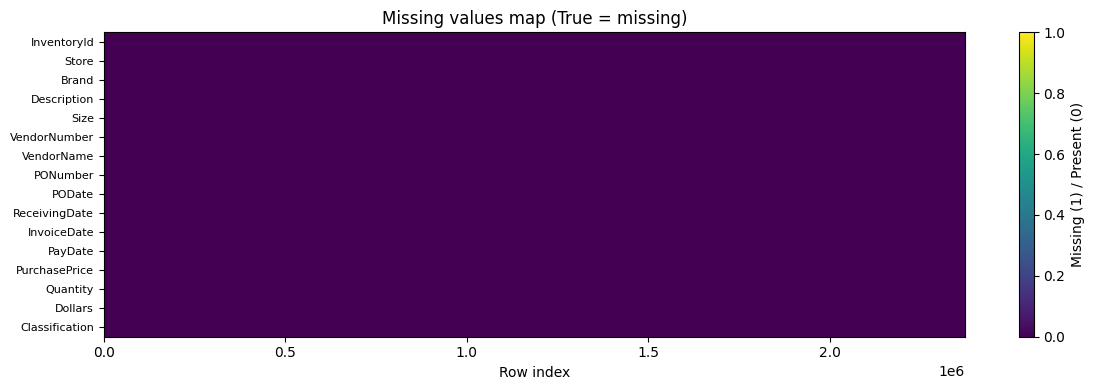

In [8]:
# Mapa de valores faltantes (solo matplotlib)
missing = df.isnull()
plt.figure(figsize=(12,4))
plt.imshow(missing.T, aspect='auto', interpolation='nearest')
plt.yticks(range(missing.shape[1]), df.columns, fontsize=8)
plt.xlabel('Row index')
plt.title('Missing values map (True = missing)')
plt.colorbar(label='Missing (1) / Present (0)')
plt.tight_layout()
plt.show()

Numeric columns: ['Store', 'Brand', 'VendorNumber', 'PONumber', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']


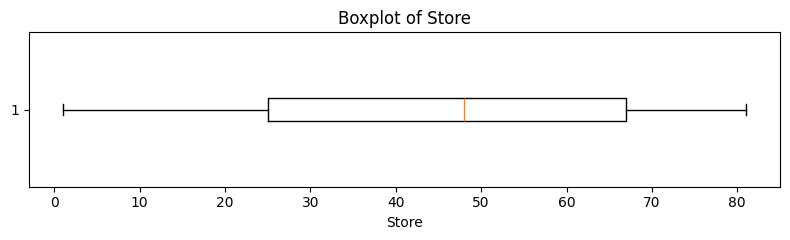

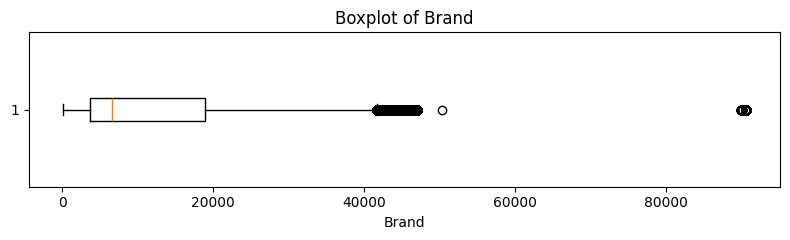

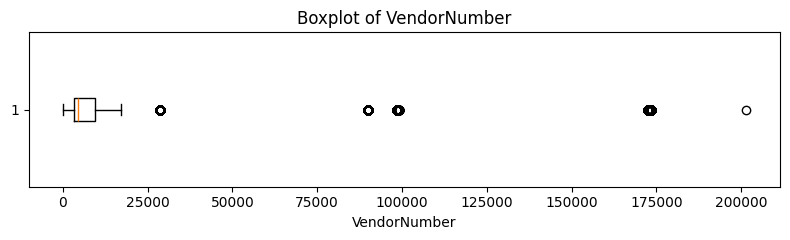

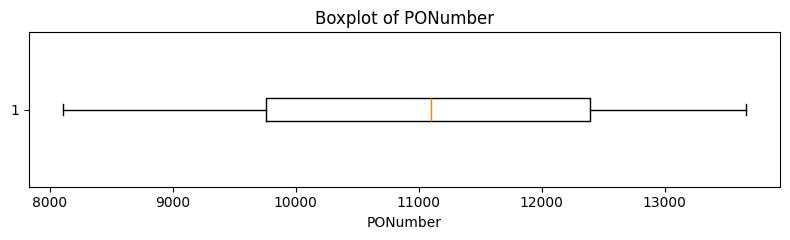

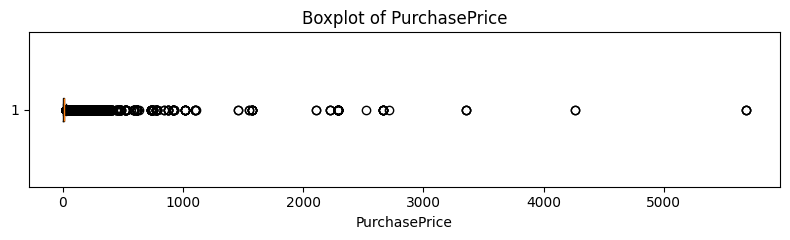

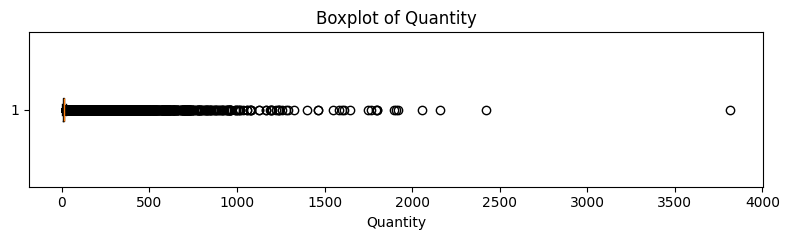

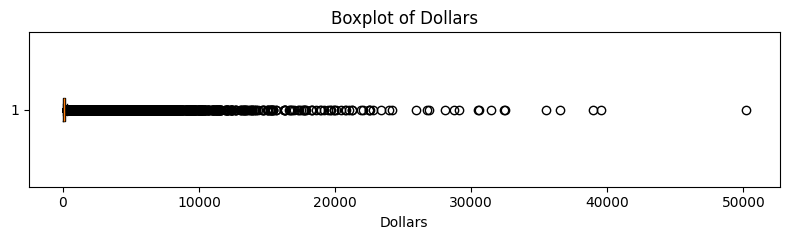

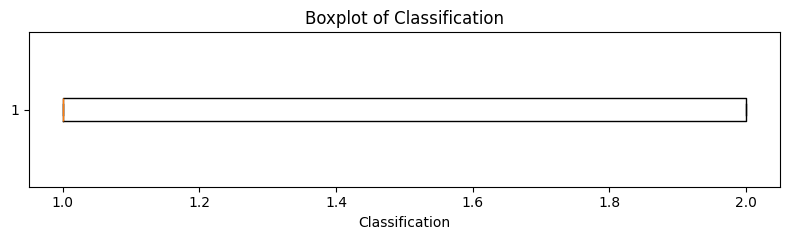

In [9]:
# Boxplots for numeric columns (matplotlib)
num_cols = df.select_dtypes(include=['number']).columns.tolist()
print('Numeric columns:', num_cols)

for col in num_cols:
    plt.figure(figsize=(8,2.5))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

-- En las variables **PurchasePrice, Quantity y Dollars** se observan valores atípicos extremos, muy alejados del resto de los datos.

-- Esto indica que existen transacciones poco comunes o errores de registro que podrían distorsionar el análisis.

-- Es recomendable no modificarlos en el EDA, sino tratarlos posteriormente en el proceso ETL para limpiar o ajustar los datos según el contexto del negocio.